# Zoo-Animal-Classification

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
import seaborn as sns
import sklearn

## Reading the Data

In [2]:
animal = pd.read_csv('../Datasets/Zoo/zoo.csv')
animal

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Understanding the Data 

In [3]:
animal.shape

(101, 18)

In [4]:
animal.size

1818

In [5]:
animal.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [6]:
animal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
animal.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


In [9]:
#Check if any duplicates are there in animal_name
copy = animal.animal_name.value_counts()
copy[copy>1]

frog    2
Name: animal_name, dtype: int64

In [10]:
#Selecting these two dupllcate frogs
frog = animal.loc[animal['animal_name']== 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
#Observation :- Found that one frog is Venomous and the Other one is Non-venomous
#Changing the Venomous one to Frog2 to differentiate between them
animal['animal_name'][(animal.venomous == 1) &(animal.animal_name == 'frog')] == 'frog2'

26    False
Name: animal_name, dtype: bool

## Visualization

<AxesSubplot:>

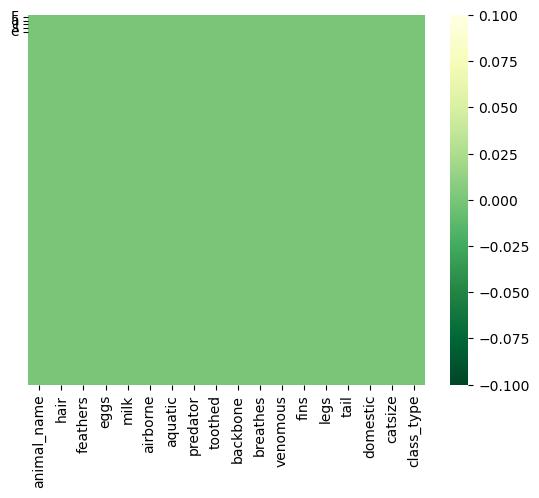

In [12]:
sns.heatmap(animal.isnull(), yticklabels='False', cmap='YlGn_r')

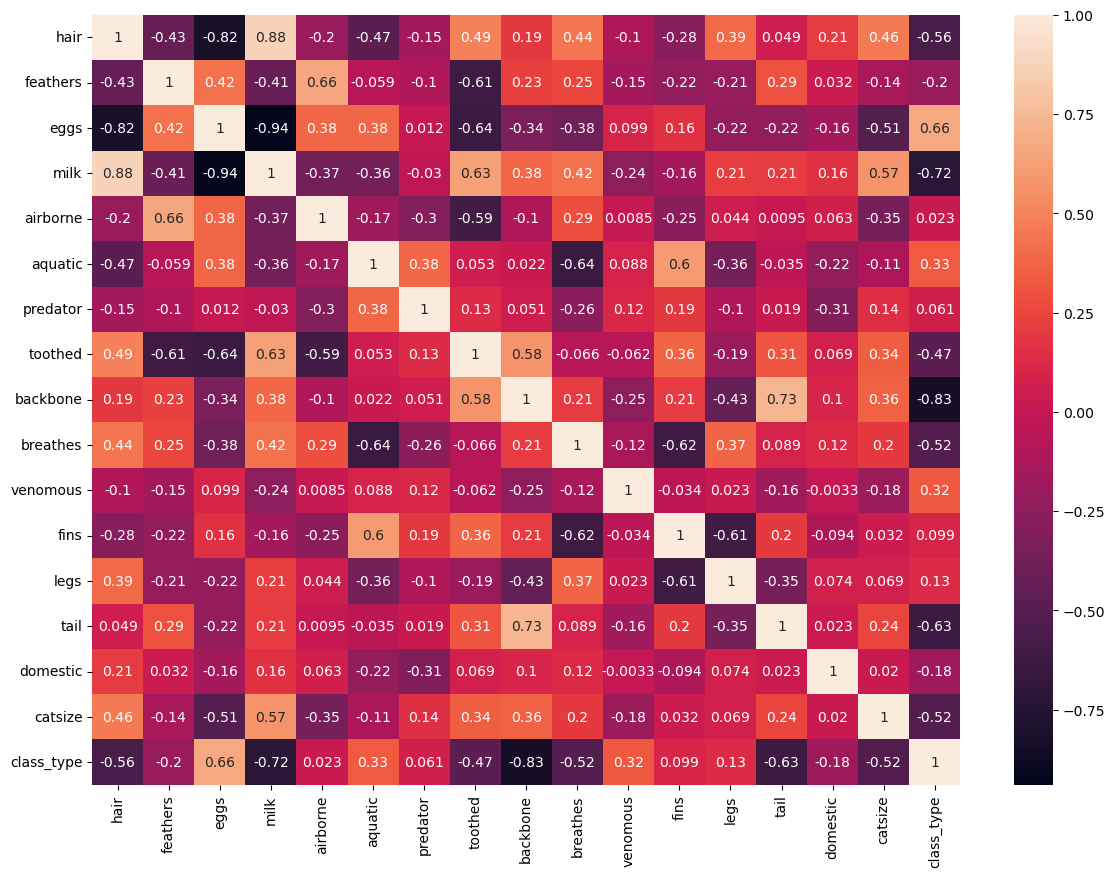

In [13]:
# To observe relation between every column attribute.
mtp.figure(figsize=(14,10))
hm = sns.heatmap(animal.corr(), annot=True)
mtp.show()

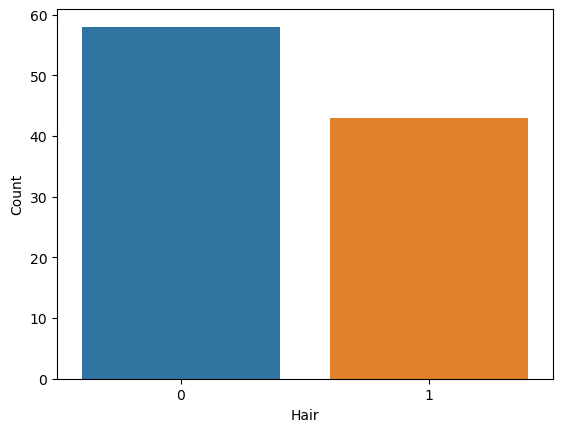

0    58
1    43
Name: hair, dtype: int64

In [14]:
sns.countplot(x = 'hair', data = animal)
mtp.xlabel('Hair')
mtp.ylabel('Count')
mtp.show()
animal.loc[:,'hair'].value_counts()

In [15]:
#Joining the zoo dataset and the class dataset to know the Class Names
ani_class = pd.read_csv('../DataSets/Zoo/class.csv')
df = pd.merge(animal, ani_class, how = 'left', left_on = 'class_type', right_on = 'Class_Number')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [16]:
# The Unique value of class_type
list_type = [i for i in animal.class_type]
unique_type = list(set(list_type))
unique_type

[1, 2, 3, 4, 5, 6, 7]

In [17]:
df = df.dropna()

<AxesSubplot:ylabel='Class_Type'>

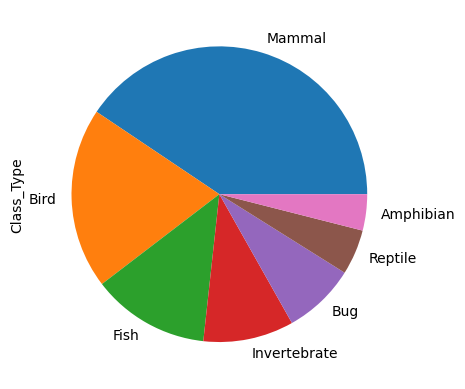

In [18]:
# Using seaborn to plot the count of 7 different class_type
# sns.catplot(x = 'Class_Type', data = df, kind = 'count', height = 5, aspect = 2)
df.Class_Type.value_counts().plot(kind = 'pie')


## Splitting the Data into Dependent and Independent Variables 

In [19]:
x = animal.iloc[:,1:17]
y = animal.iloc[:,17]


## Training and Testing the Data 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)


# 1. Support Vector Machine

Accuracy of Training Data:  100.0
Accuracy of Testing Data:  96.7741935483871


<AxesSubplot:>

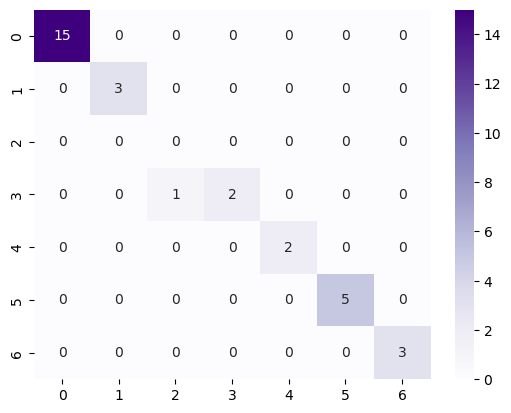

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
svc = SVC(C = 10)
svc.fit(x_train, y_train)

ypred_train = svc.predict(x_train)
ypred_test = svc.predict(x_test)

print("Accuracy of Training Data: ", accuracy_score(y_train, ypred_train)*100)
ac1 = accuracy_score(y_test, ypred_test)*100
print("Accuracy of Testing Data: ", ac1)


cm1 = np.array(confusion_matrix(ypred_test, y_test))
sns.heatmap(pd.DataFrame(cm1), annot = True, cmap ='Purples', fmt= 'g' )


# 2. Logistic Regression 

Accuracy of Training Data:  100.0
Accuracy of Testing Data:  93.54838709677419


<AxesSubplot:>

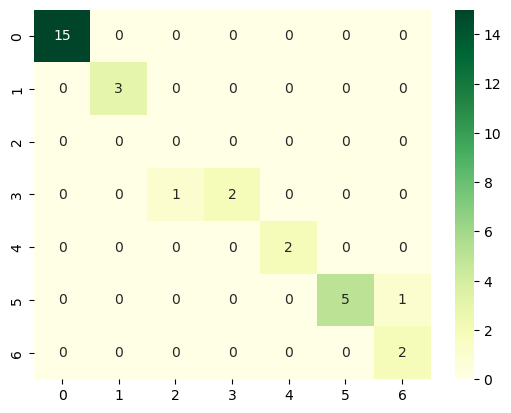

In [22]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 5)
lm.fit(x_train, y_train)

ypred_train = lm.predict(x_train)
ypred_test = lm.predict(x_test)

print("Accuracy of Training Data: ", accuracy_score(y_train, ypred_train)*100)
ac2 = accuracy_score(y_test, ypred_test)*100
print("Accuracy of Testing Data: ", ac2)

cmt2 = confusion_matrix(ypred_test, y_test)
sns.heatmap(pd.DataFrame(cmt2), annot = True, cmap = 'YlGn', fmt = 'g')


# 3. K Nearest Neighbor

Accuracy of Training Data:  98.57142857142858
Accuracy of Testing Data:  93.54838709677419


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

<AxesSubplot:>

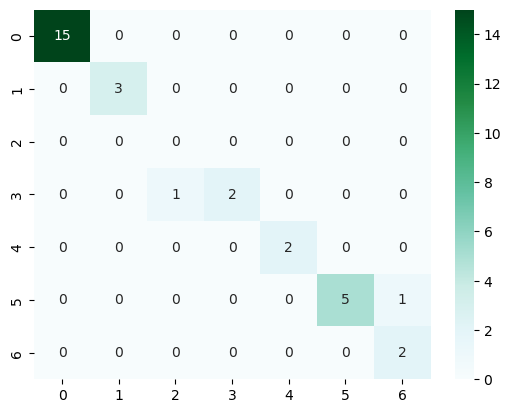

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
# prediction
ypred_train = knn.predict(x_train)
ypred_test = knn.predict(x_test)

print("Accuracy of Training Data: ", accuracy_score(y_train, ypred_train)*100)
ac3 = accuracy_score(y_test, ypred_test)*100
print("Accuracy of Testing Data: ", ac3)

cmt3 = np.array(confusion_matrix(ypred_test, y_test))
sns.heatmap(pd.DataFrame(cmt3), annot = True, cmap = "BuGn", fmt = 'g')

# Comparison of Accuracy between Different Models

<AxesSubplot:>

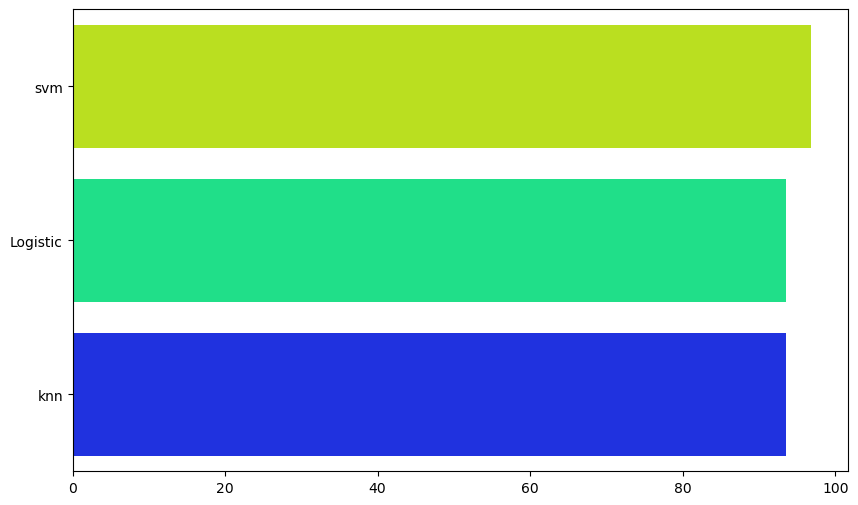

In [24]:
accuracies = {'svm':ac1, 'Logistic': ac2, 'knn': ac3}

mtp.figure(figsize = (10, 6))
model_accuracies  = list(accuracies .values())
model_names       = list(accuracies .keys())
sns.barplot(x = model_accuracies, y = model_names, palette = 'gist_rainbow' )